In [1]:
import os
import sys
import pathlib
import math
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline 
import seaborn as sns

import numpy as np
import pandas as pd

In [2]:
data_path = "D:/ProgramData/Jupyter Notebook/UG4/results/TMLE/Dublin"

In [161]:
# Highlights: DBCA04, DBCC14
# Outliers (1min): DBIA03
# Outliers (5min): DBCC12, DBCC07, 
#   DBCA06, DBIA01
# Medium (5min): DBCC02, 
#   DBSA04
ids = ["DBCA04", "DBCC14", "DBCC02", "DBSA04", "DBIA03", "DBCC07", "DBIA01", "DBCC12", "DBCA06"]
N_list = [1, 5, 10, 15, 20]
df = pd.DataFrame(index=ids)
for N in N_list:
    df_N = pd.read_csv(f"{data_path}/result{N}.csv")
    df_N.columns = ["id", f"N={N}", "se"]
    df_N = df_N.drop(columns=["se"])
    df_N.set_index("id", inplace=True)
    df_N = df_N.filter(ids, axis=0)
    df = df.join(df_N)
# df["type"] = t
# df.reset_index(inplace=True)
df

,N=1,N=5,N=10,N=15,N=20
DBCA04,0.028122,0.028062,0.018907,0.012462,1.181629e-02
DBCC14,0.037197,0.036194,0.033208,0.034222,3.669120e-02
DBCC02,-0.009139,0.001326,0.000537,0.000051,4.713643e-04
DBSA04,0.011432,0.019611,0.022457,0.021266,1.757199e-02
DBIA03,0.186367,0.021476,0.009055,0.000144,1.738816e-07
DBCC07,0.052523,0.040508,0.037124,0.037082,3.662741e-02
DBIA01,0.104733,0.083446,0.044441,0.026559,1.652574e-02
DBCC12,-0.063317,-0.045900,-0.038369,-0.032723,-3.916172e-02
DBCA06,-0.106077,-0.107472,-0.100613,-0.098073,-9.758375e-02


In [162]:
df_group = df.copy()
t = ["Highlight"]*2 + ["Medium"]*2 + ["Outlier (left)"]*3 + ["Outlier (right)"]*2
c = ["blue"]*2 + ["green"]*2 + ["red"]*3 + ["orange"]*2
l = ['-' if i[3] == "C" else '--' for i in list(df.index)]

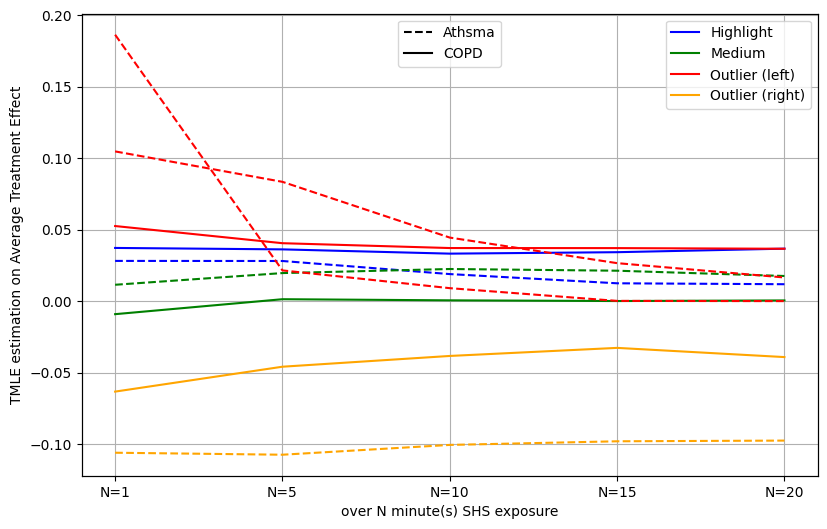

In [163]:
fig, ax = plt.subplots(figsize=(9.5, 6))
for i in range(len(df)):
    ax.plot(df.iloc[i], c=c[i], linestyle=l[i])

for cc, col in enumerate(list(dict.fromkeys(c))):
    ax.plot(np.NaN, np.NaN, c=col, label=list(dict.fromkeys(t))[cc])

ax2 = ax.twinx()
diagnosis = ["Athsma", "COPD"]
for ss, sty in enumerate(list(dict.fromkeys(l))):
    ax2.plot(np.NaN, np.NaN, ls=l[ss],
             label=diagnosis[ss], c='black')
    
ax2.get_yaxis().set_visible(False)

ax.legend(loc="upper right")
ax2.legend(loc="upper center")

ax.set_xlabel("over N minute(s) SHS exposure")
ax.set_ylabel("TMLE estimation on Average Treatment Effect")
ax.grid()

plt.show()

In [ ]:
sns.lineplot( x=df["Date"],y=df["Sales"],hue=df["Console"])